# 영양소 데이터 분석

## 데이터 로드

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
data = pd.read_csv("C:/Users/A/Downloads/nutrients.csv")
data

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [141]:
data.isna().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

* 각 음식별로 특성이 다르기에 결측치를 날려버리기로 함 
* t라고 적혀있는 값은 매우 작은값을 의미함 (0에 매우 가까움)

## 전처리

### 1) 결측치 제거

In [142]:
modi_data = data.dropna(axis = 0) ## 원본 훼손하지않은 채 저장 (결측지만 제거, 인덱스는 그대로_)
modi_data = modi_data.reset_index() ## 인덱스를 초기화해서 다시 저장

In [143]:
modi_data.isnull().sum()

index       0
Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat.Fat     0
Fiber       0
Carbs       0
Category    0
dtype: int64

In [144]:
modi_data

,index,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...,...
327,330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [145]:
modi_data.info() ## object 타입이므로 변환이 필요하다!!!! 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     332 non-null    int64 
 1   Food      332 non-null    object
 2   Measure   332 non-null    object
 3   Grams     332 non-null    object
 4   Calories  332 non-null    object
 5   Protein   332 non-null    object
 6   Fat       332 non-null    object
 7   Sat.Fat   332 non-null    object
 8   Fiber     332 non-null    object
 9   Carbs     332 non-null    object
 10  Category  332 non-null    object
dtypes: int64(1), object(10)
memory usage: 28.7+ KB


In [146]:
modi_data.describe()

,index
count,332.000000
mean,167.677711
std,96.956160
min,0.000000
25%,83.750000
50%,168.500000
75%,251.250000
max,334.000000


* Food	: 식품 이름
* Measure	: 식품의 양
* Grams : 단위
* Calories	: 칼로리
* Protein	: 단백질
* Fat	: 지방
* Sat.Fat	: 포화지방
* Fiber	: 식이섬유
* Carbs	: 탄수화물
* Category : 식품 종류

## 2) 인덱스 열 제거

In [147]:
modi_data = modi_data.drop('index', axis = 1)
modi_data

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


## 3) 숫자 자릿수 구분 제거 
* (replace(바꾸기전, 바꾼 후, regex = True)

In [148]:
modi_data = modi_data.replace(',', '', regex = True)
modi_data

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,DrinksAlcohol Beverages
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,DrinksAlcohol Beverages
329,Root beer,12 oz.,346,140,0,0,0,0,35,DrinksAlcohol Beverages
330,Coffee,1 cup,230,3,t,0,0,0,1,DrinksAlcohol Beverages


## 4) 이상값 확인 / Gram ~ Carbs 열에서 숫자가 아닌 값 찾기

In [149]:
modi_data.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,332,332,332,332,332,332,332,332,332,332
unique,326,61,102,150,40,44,38,57,79,16
top,Butter,1 cup,100,100,1,t,0,0,0,Breads cereals fastfoodgrains
freq,3,118,37,14,53,114,173,115,44,45


In [150]:
check = {i : [] for i in modi_data.columns[2:-1]}  ## dictionary 사용 
check

{'Grams': [],
 'Calories': [],
 'Protein': [],
 'Fat': [],
 'Sat.Fat': [],
 'Fiber': [],
 'Carbs': []}

In [151]:
for col in modi_data.columns[2:-1]:
    for idx, value in enumerate(modi_data[col]):
        if not value.isdigit() and value not in check[col] and '.' not in value:
            check[col].append(value)
            
            ## 정수 아니면서 실수도 아니면서 중복이 아닌 경우에만 출력

In [152]:
check

{'Grams': [],
 'Calories': ['8-44'],
 'Protein': ['t', '-1'],
 'Fat': ['t', "t'"],
 'Sat.Fat': ['t'],
 'Fiber': ['t', 'a'],
 'Carbs': ['t']}

## 이상값 대치

In [153]:
modi_data = modi_data.replace('t', 0)
modi_data = modi_data.replace("t'", 0)
modi_data.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,Evaporated undiluted,1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,1419,1373,89,42,23,1.4,119,Dairy products


In [154]:
for i, j in enumerate(modi_data['Calories']):  ## 칼로리에서 이상치 찾기
    if j == '8-44':
        print(i,j)

90 8-44


In [155]:
modi_data['Grams'][90]

'100'

In [156]:
modi_data['Calories'][90] = 47.1
modi_data['Calories'][90]

47.1

In [157]:
count = 0
for i, j in enumerate(modi_data['Fiber']): ## Fiber에서 이상치 찾기
    if j == 'a':
        count += 1 
        print(i,j)
        
count 

80 a


1

In [158]:
modi_data['Food'][80] 

'Mackerel'

In [159]:
modi_data.iloc[80,:]

Food            Mackerel
Measure            3 oz.
Grams                 85
Calories             155
Protein               18
Fat                    9
Sat.Fat                0
Fiber                  a
Carbs                  0
Category    Fish Seafood
Name: 80, dtype: object

In [160]:
modi_data['Fiber'] = modi_data['Fiber'].replace('a', 0)

## 5) 숫자 형태의 문자열을 숫자로 변경

In [161]:
for col in modi_data.columns [2:-1]:
    modi_data[col] = pd.to_numeric(modi_data[col])

In [162]:
modi_data.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,188.584639,8.590361,8.451807,6.457831,2.384970,25.169578
std,139.194736,184.020624,17.809184,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


## 6) 이상치 대체

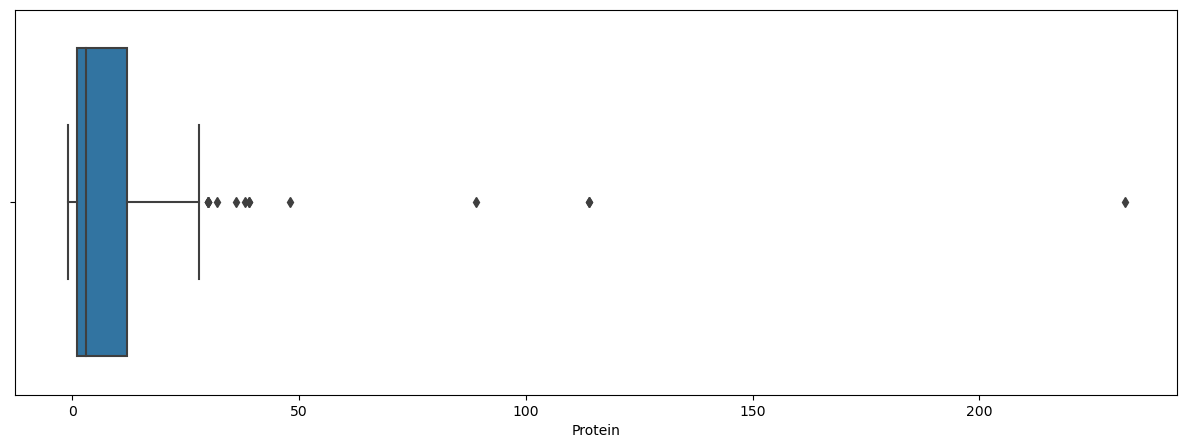

In [163]:
plt.figure(figsize=(15, 5))
sns.boxplot(data = modi_data, x="Protein");

In [164]:
modi_data.loc[modi_data['Protein'] < 0, 'Protein'] = 0

In [165]:
modi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      332 non-null    object 
 1   Measure   332 non-null    object 
 2   Grams     332 non-null    int64  
 3   Calories  332 non-null    float64
 4   Protein   332 non-null    int64  
 5   Fat       332 non-null    int64  
 6   Sat.Fat   332 non-null    int64  
 7   Fiber     332 non-null    float64
 8   Carbs     332 non-null    float64
 9   Category  332 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 26.1+ KB


In [166]:
modi_data.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
count,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000,332.000000
mean,143.527108,188.584639,8.593373,8.451807,6.457831,2.384970,25.169578
std,139.194736,184.020624,17.807642,19.711379,18.542220,16.126211,35.936783
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,75.000000,1.000000,0.000000,0.000000,0.000000,3.000000
50%,108.000000,131.000000,3.000000,1.000000,0.000000,0.200000,14.000000
75%,200.000000,250.000000,12.000000,10.000000,8.000000,1.000000,31.000000
max,1419.000000,1373.000000,232.000000,233.000000,234.000000,235.000000,236.000000


## 카테고리 값 확인

In [167]:
modi_data['Category'].value_counts()

Breads cereals fastfoodgrains    45
Meat Poultry                     29
Desserts sweets                  29
Dairy products                   28
Fruits G-P                       28
Vegetables A-E                   27
Vegetables R-Z                   27
Fruits A-F                       22
Fish Seafood                     19
Fats Oils Shortenings            14
Vegetables F-P                   14
Seeds and Nuts                   12
DrinksAlcohol Beverages          12
Soups                            10
Fruits R-Z                        8
Jams Jellies                      8
Name: Category, dtype: int64

## 카테고리 묶기

In [168]:
new_category = ['Fruits', 'Vegetables']

In [169]:
for category in new_category: 
    for old_category in modi_data['Category']:
        if category in old_category:
            modi_data.loc[modi_data['Category'] == old_category, 'Category'] = category

In [170]:
modi_data['Category'].value_counts()

Vegetables                       68
Fruits                           58
Breads cereals fastfoodgrains    45
Meat Poultry                     29
Desserts sweets                  29
Dairy products                   28
Fish Seafood                     19
Fats Oils Shortenings            14
Seeds and Nuts                   12
DrinksAlcohol Beverages          12
Soups                            10
Jams Jellies                      8
Name: Category, dtype: int64

In [171]:
data.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


## 측정단위 확인

In [172]:
for i in modi_data['Measure'].value_counts().index:
    print(i)

1 cup
3 oz.
1/2 cup
1 slice
1 T.
1
1 med.
3 1/2 oz.
3/4 cup
12 oz.
2
1 oz.
2 T.
1 large
2 oz.
2 cups
1/3 cup
3 med.
5
4
10
6-oz. can
4 cups
1 serving
1-lb. loaf
1/4 head
1/2 med.
1 qt.
1T.
1 1/3 cups
1 mad.
2-oz. bar
2 pieces
1 section
2 med.
6 cups
2/3 cup
1 wedge
I med.
1 large slice
8 oz. or
1-in. cube
1/2
3
1/2 large
1 ear
1 med
1/4 lb.
5 small
2 slices
10 pieces
1 pie
1 pod
4 oz.
1 small
6 small
aver.
6-8 med.
1 steak
6 spears
8


In [173]:
modi_data2 = modi_data.drop('Measure', axis = 1)
modi_data2

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976,660.0,32,40,36,0.0,48.0,Dairy products
1,Milk skim,984,360.0,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,246,127.0,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,252,345.0,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,1419,1373.0,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,346,161.0,0,0,0,0.0,42.0,DrinksAlcohol Beverages
328,Ginger ale,346,105.0,0,0,0,0.0,28.0,DrinksAlcohol Beverages
329,Root beer,346,140.0,0,0,0,0.0,35.0,DrinksAlcohol Beverages
330,Coffee,230,3.0,0,0,0,0.0,1.0,DrinksAlcohol Beverages


In [174]:
from sklearn.preprocessing import LabelEncoder

In [175]:
encoder = LabelEncoder()
y = encoder.fit_transform(modi_data2['Category'])
y = pd.DataFrame(y, columns = ['Target'])
y

,Target
0,1
1,1
2,1
3,1
4,1
...,...
327,3
328,3
329,3
330,3


## 데이터 분석 (EDA)

### 단백질 순위 (함량이 높은 순서대로 출력하기)

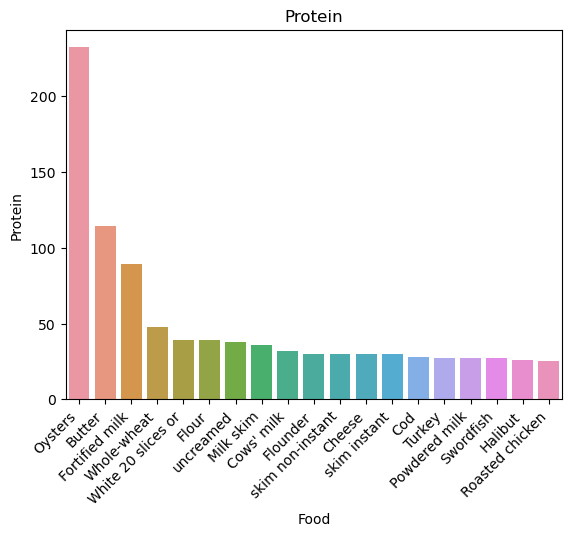

In [176]:
plt.figure()
plt.title('Protein')
protein_rich = modi_data2.sort_values(by='Protein', ascending = False)
sns.barplot(data = protein_rich.head(20), x='Food', y='Protein')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

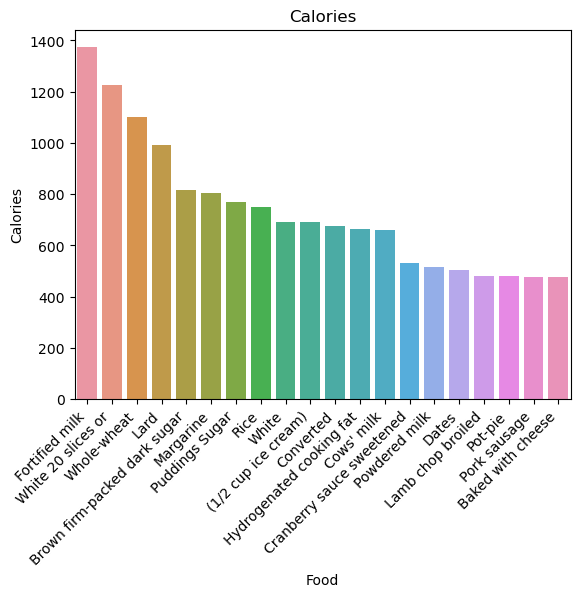

In [177]:
plt.figure()
plt.title('Calories')
protein_rich = modi_data2.sort_values(by='Calories', ascending = False)
sns.barplot(data = protein_rich.head(20), x='Food', y='Calories')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

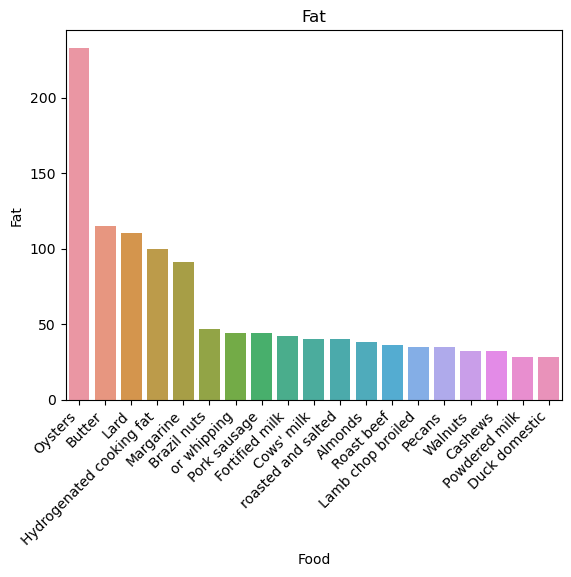

In [178]:
plt.figure()
plt.title('Fat')
protein_rich = modi_data2.sort_values(by='Fat', ascending = False)
sns.barplot(data = protein_rich.head(20), x='Food', y='Fat')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

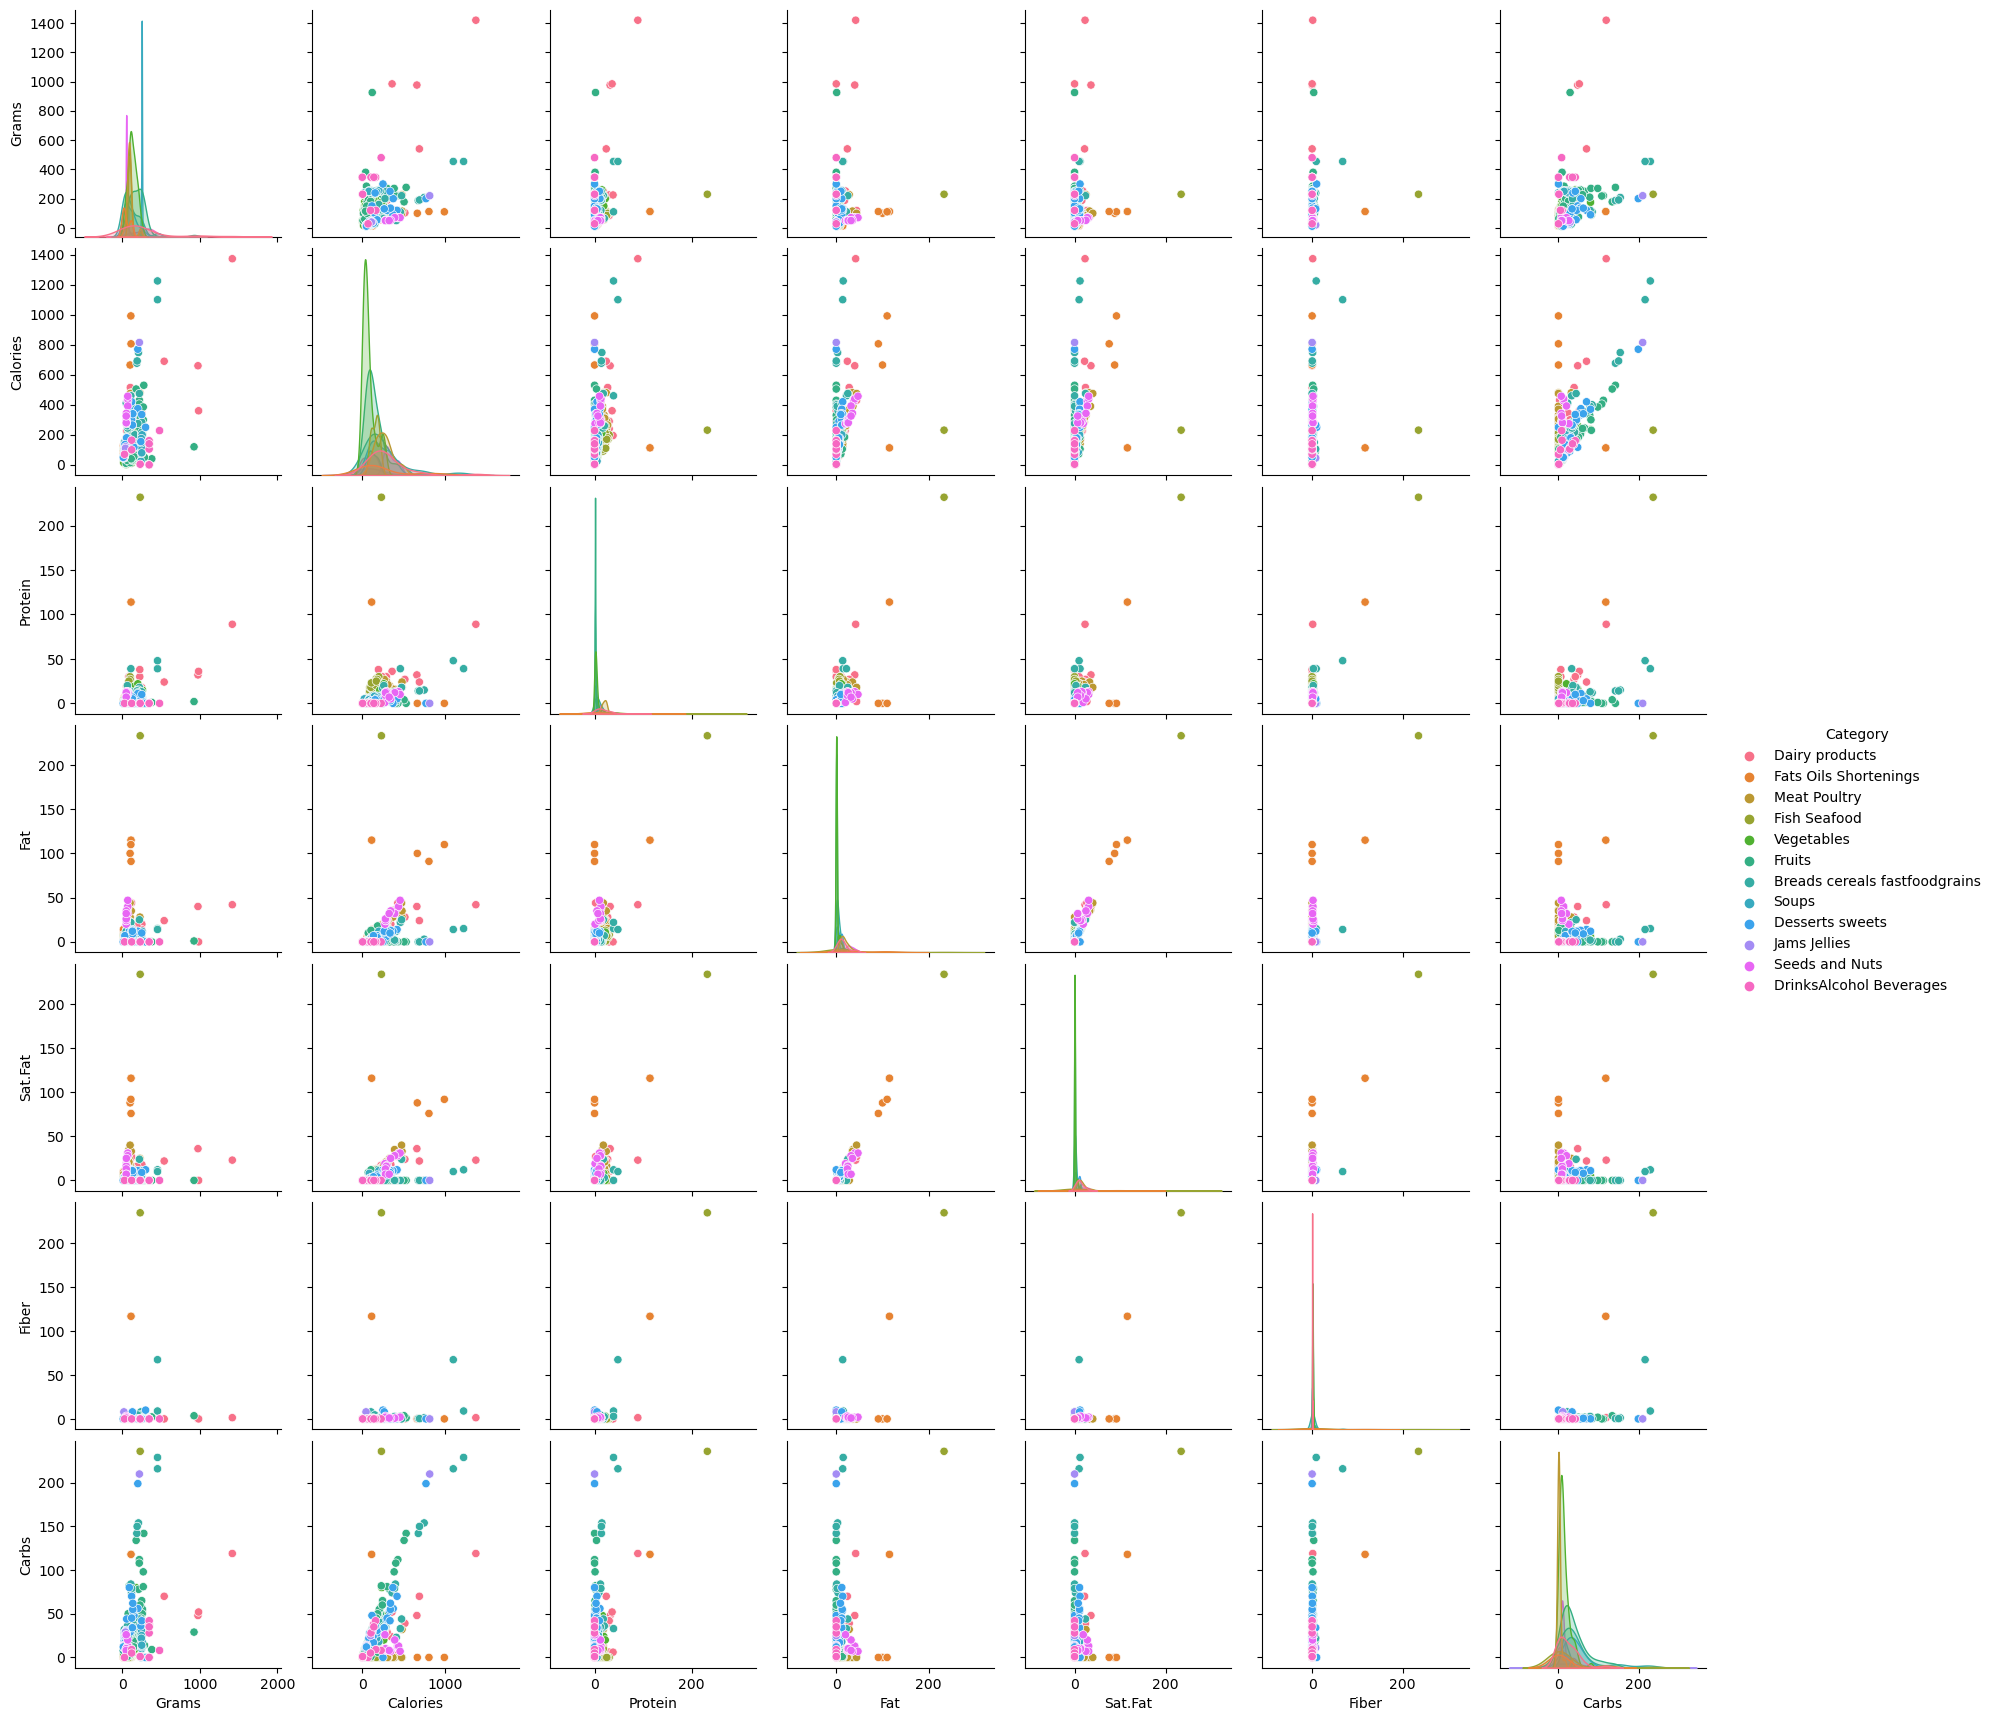

In [179]:
sns.pairplot(data = modi_data2, hue = 'Category')
plt.show()

In [180]:
modi_data2.head()

,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,976,660.0,32,40,36,0.0,48.0,Dairy products
1,Milk skim,984,360.0,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,246,127.0,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,252,345.0,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,1419,1373.0,89,42,23,1.4,119.0,Dairy products


## 정규화 

* 값을 0 ~ 1 사이의 값으로 매핑한다.
* Feature들의 단위를 통일

In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit([modi_data2.iloc[:, 1]])
transform = scaler.transform([modi_data2.iloc[:, 1]])
transform = transform.transpose()
modi_data3 = pd.DataFrame(transform)
print(modi_data3)
modi_data2['Grams'] = modi_data3
modi_data2

       0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
327  0.0
328  0.0
329  0.0
330  0.0
331  0.0

[332 rows x 1 columns]


,Food,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,0.0,660.0,32,40,36,0.0,48.0,Dairy products
1,Milk skim,0.0,360.0,36,0,0,0.0,52.0,Dairy products
2,Buttermilk,0.0,127.0,9,5,4,0.0,13.0,Dairy products
3,Evaporated undiluted,0.0,345.0,16,20,18,0.0,24.0,Dairy products
4,Fortified milk,0.0,1373.0,89,42,23,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,0.0,161.0,0,0,0,0.0,42.0,DrinksAlcohol Beverages
328,Ginger ale,0.0,105.0,0,0,0,0.0,28.0,DrinksAlcohol Beverages
329,Root beer,0.0,140.0,0,0,0,0.0,35.0,DrinksAlcohol Beverages
330,Coffee,0.0,3.0,0,0,0,0.0,1.0,DrinksAlcohol Beverages


In [182]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.
